<a href="https://colab.research.google.com/github/spaceo521/Data-Science-Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
#Load the dataset

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [ ]:
# Print the first few rows of the DataFrame

print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

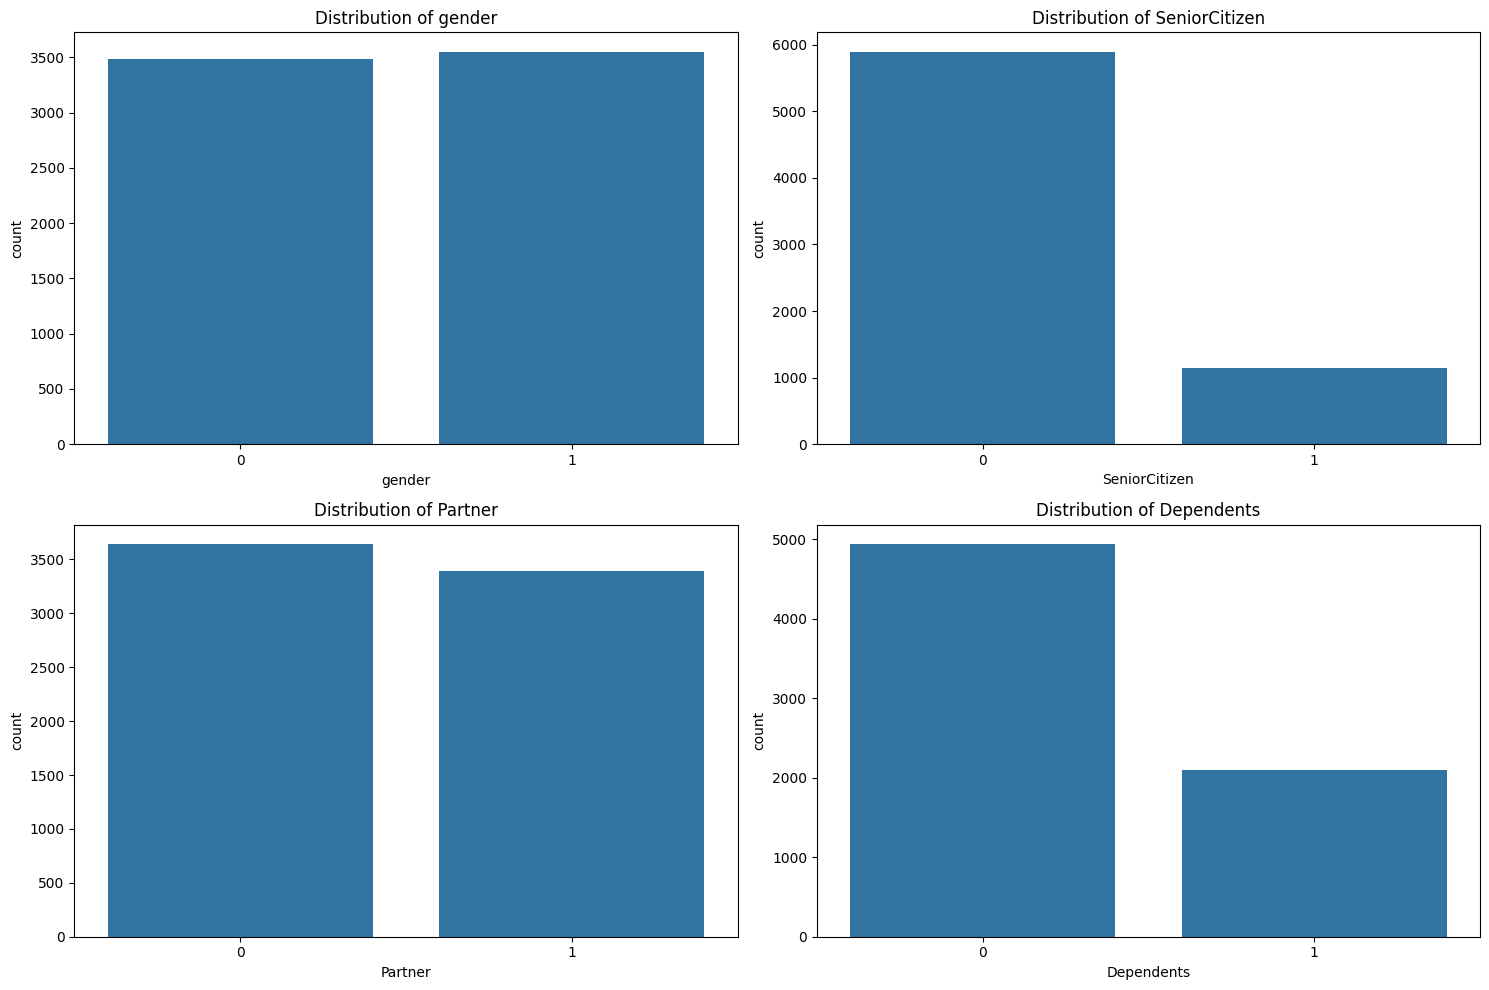

In [ ]:
# Set the figure size

plt.figure(figsize=(15, 10))
# Loop through each column and create subplots

for i, column in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
      # Create a subplot in a 2x2 grid

    plt.subplot(2, 2, i + 1)
       # Plot the count distribution using Seaborn's countplot

    sns.countplot(x=column, data=df)
        # Set the title of the subplot dynamically

    plt.title(f'Distribution of {column}')
    # Adjust the layout of subplots to prevent overlap

plt.tight_layout()
# Display the plot

plt.show()

In [ ]:
# Drop the 'customerID' column from the DataFrame

df.drop(['customerID'], axis=1, inplace=True)


In [ ]:
# Convert 'TotalCharges' column to numeric, coercing errors to NaN

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values

df.dropna(inplace=True)


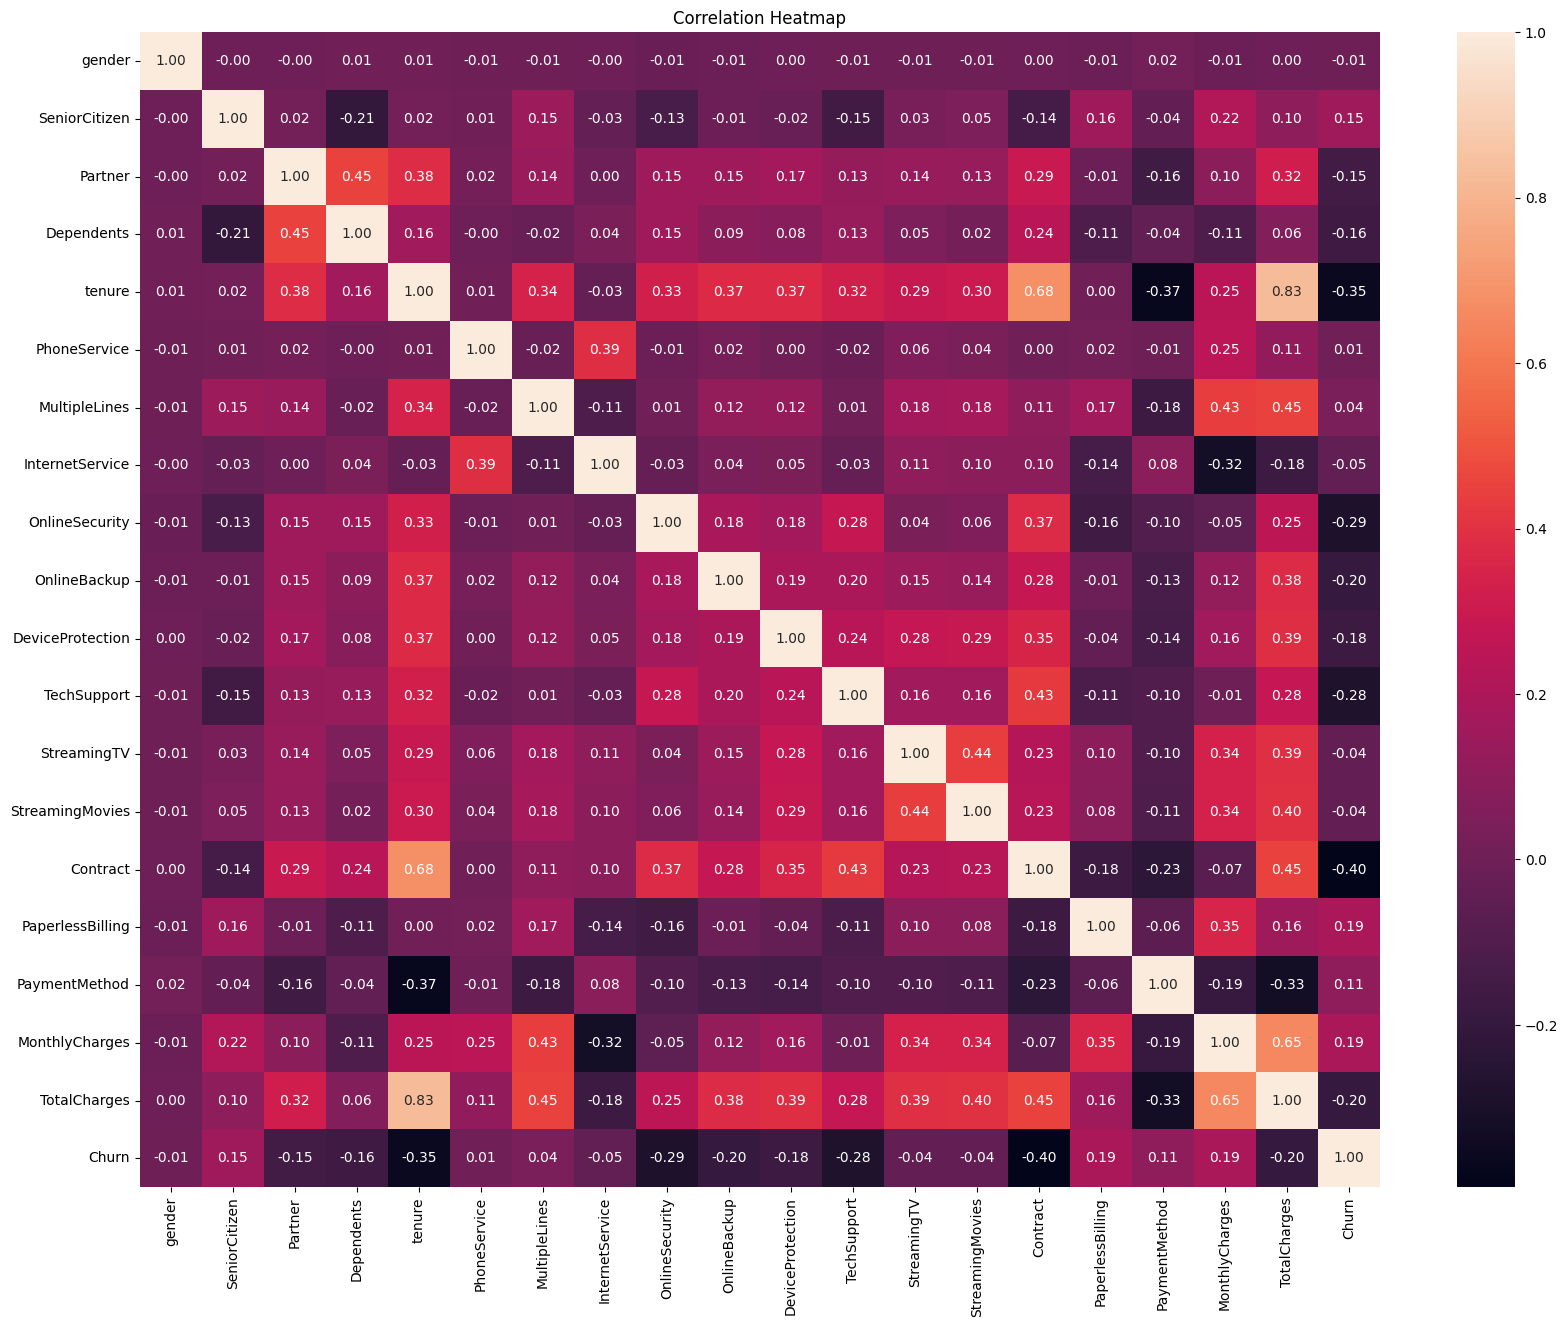

In [ ]:
# Set the figure size

plt.figure(figsize=(20, 15))
# Create a heatmap of correlations between numerical columns

sns.heatmap(df.corr(), annot=True, fmt=".2f")
# Set the title of the heatmap

plt.title('Correlation Heatmap')

#display the plot
plt.show()

In [ ]:
# List of categorical columns for labeling or encoding

label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
              'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
# Iterate over each column in label_cols and apply LabelEncoder

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


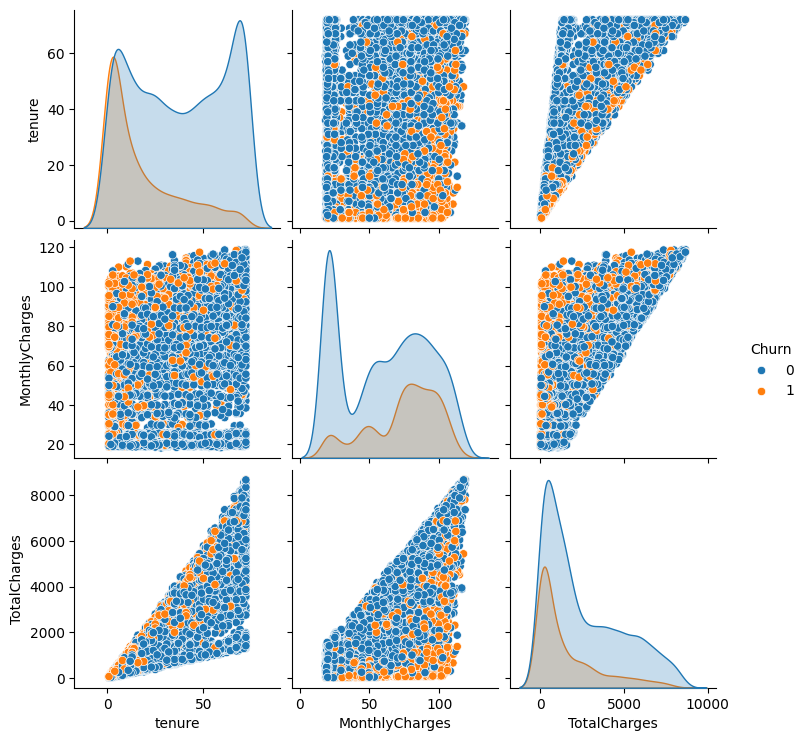

In [ ]:
# List of selected features and target variable for pair plotting

selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
# Create a pair plot

sns.pairplot(df[selected_features], hue='Churn')
# Display the plot

plt.show()

In [ ]:
#df is the datafram containing the target variable and Drop the 'Churn' column to create features (X)

X = df.drop(['Churn'], axis=1)
# Select the 'Churn' column as the target variable (y)

y = df['Churn']


In [ ]:
# Split the data into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a StandardScaler instance

scaler = StandardScaler()
# Fit the scaler on the training data and transform X_train

X_train = scaler.fit_transform(X_train)
# Transform X_test using the fitted scaler (no fitting again to avoid data leakage)

X_test = scaler.transform(X_test)


In [ ]:
# Create an instance of the RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model to the training data

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions using the trained RandomForestClassifier

y_pred = model.predict(X_test)


In [ ]:
# Print the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
#printtt the confusion matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[932 101]
 [194 180]]


In [ ]:
#print the accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.7903340440653873


In [ ]:
# Obtain feature importances from the trained RandomForestClassifier

feature_importance = model.feature_importances_

# Get the names of the features (column names from X)

features = X.columns


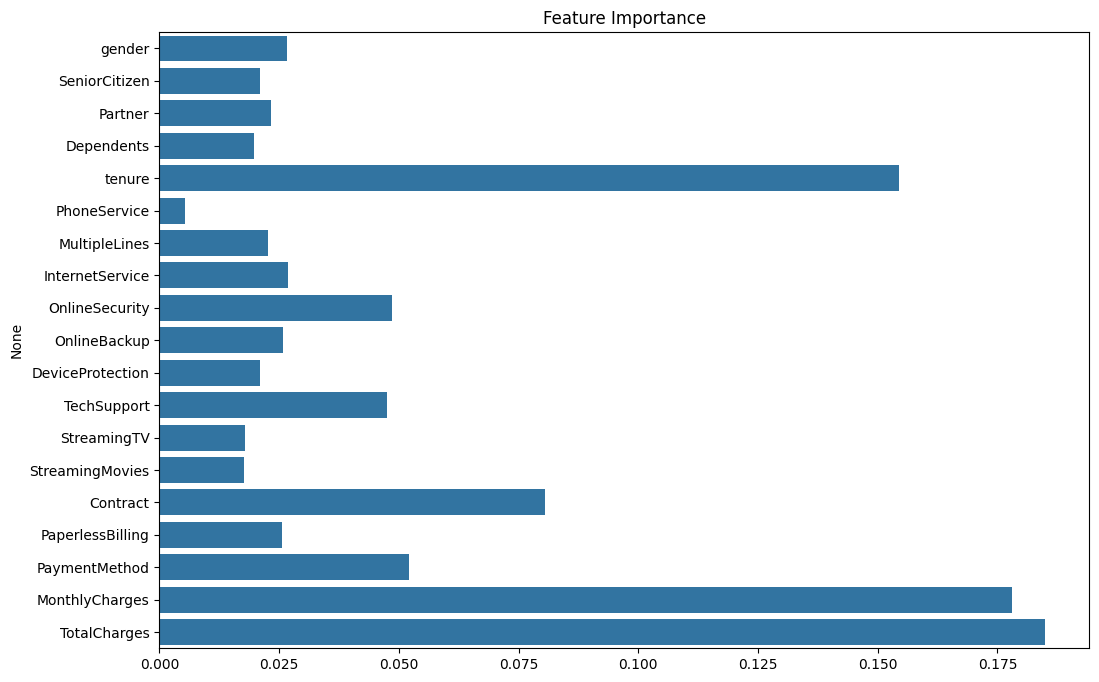

In [ ]:
#to create the bar plots
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()

In [ ]:
# Create a DataFrame to compare actual and predicted values

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Reset the index of the DataFrame

predictions_df.reset_index(drop=True, inplace=True)


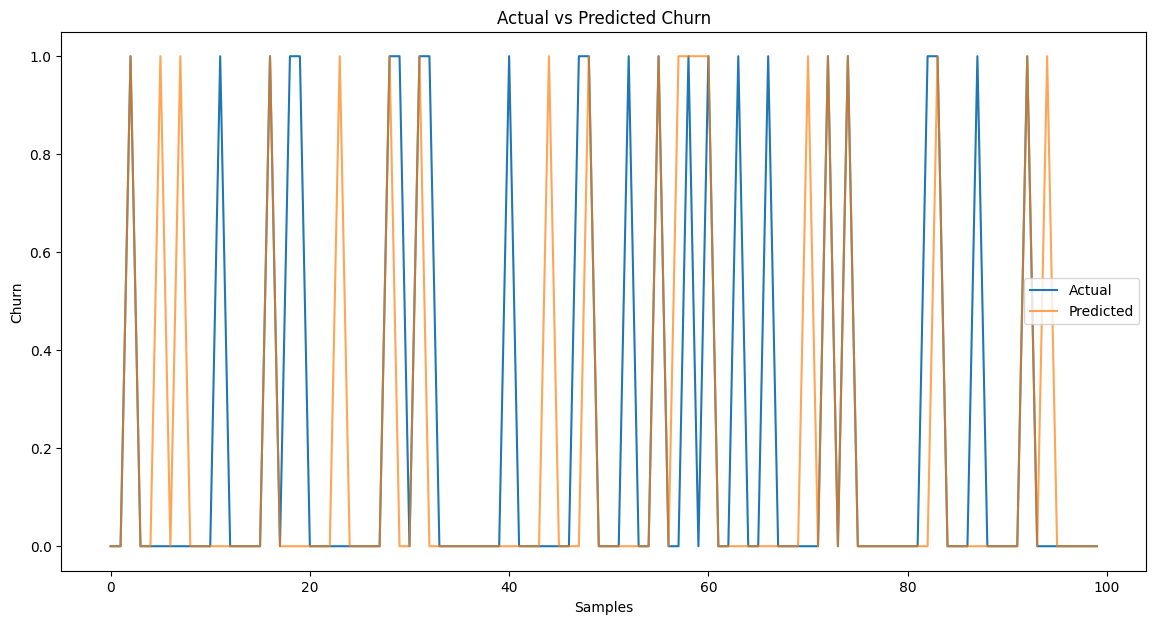

In [ ]:
#to create plot
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Actual'][:100], label='Actual')
plt.plot(predictions_df['Predicted'][:100], label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Churn')
plt.xlabel('Samples')
plt.ylabel('Churn')
plt.legend()
plt.show()